<a href="https://colab.research.google.com/github/Asohail115/Ted-Talk-Views-prediction-Capstone-Regression/blob/main/Ted_Talk_Views_prediction_Capstone_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Ted Talk Views Prediction



##### **Project Type**    - Regression(supervised)
##### **Contribution**    - Individual
##### **Aamir Sohail**

# **Project Summary -**



TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

# **GitHub Link -**

Provide your GitHub Link here.
[link text](https://github.com/Asohail115
)

# **Problem Statement**




The problem statement was to build a machine learning model that could predict the views of the videos uploaded on the TEDx website.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [65]:
# Import Libraries
import pandas as pd
import numpy as np
import time
import datetime
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
from wordcloud import WordCloud,ImageColorGenerator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# ignoring warnings.
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [215]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [216]:
# Importing the dataset
df = pd.read_csv("/content/drive/MyDrive/Ted-Talk-Views-Prediction Regression Machine Learning Project/data_ted_talks.csv")

### Dataset First View

In [217]:
# Dataset First Look
df.head(5)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


### Dataset Rows & Columns count

In [218]:
# Dataset Rows & Columns count
df.shape

(4005, 19)

### Dataset Information

In [70]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

#### Duplicate Values

In [71]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

we have zero duplicated rows in our dataset

#### Missing Values/Null Values

In [219]:
# Missing Values/Null Values Count
df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

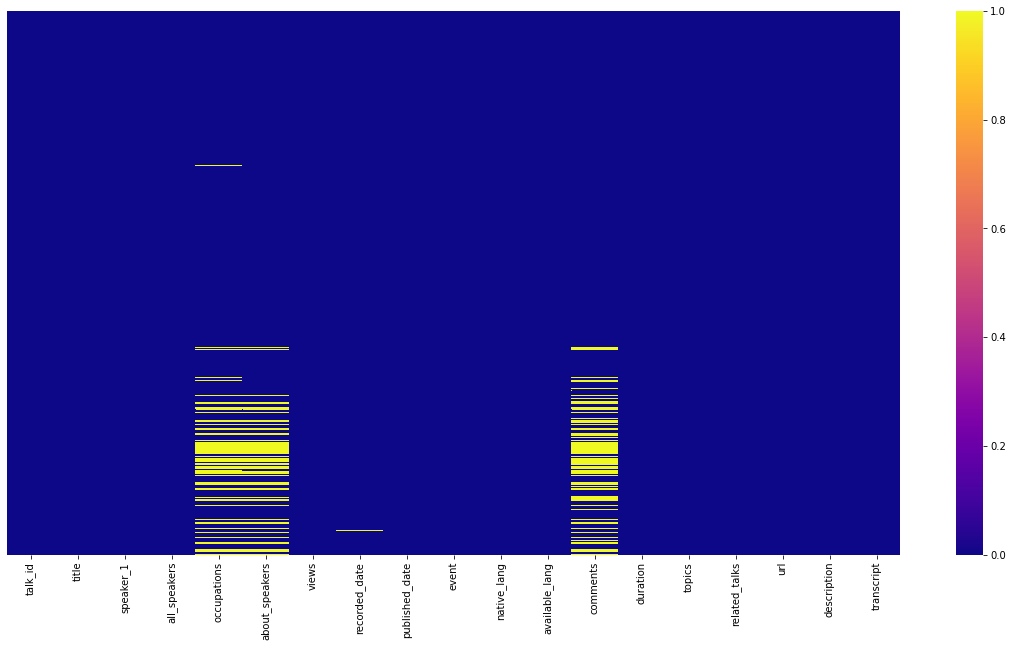

In [73]:
# Visualizing the missing values
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap="plasma")

From the above analysis

The dataset contains NaN values in few columns like:

* all_speakers
* occupations
* about_speakers
* recorded_date
* comments

### What did you know about your dataset?



The datasets contain over
4,000 TED talks including transcripts in many languages.
Founded in 1984 by Richard Salman as a nonprofit organization
that aimed at bringing experts from the fields of Technology, Entertainment, and Design
together, TED Conferences have gone on to become the Mecca of ideas from virtually all
walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000
talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore,
Jimmy Wales, Shahrukh Khan, and Bill Gates.
The main objective is to build a predictive model, which could help in predicting the views of
the videos uploaded on the TEDx website.

## ***2. Understanding Your Variables***

In [74]:
# Dataset Columns
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [75]:
# Dataset Describe
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


### Variables Description 

The dataset contains features like:

* talk_id: Talk identification number provided by TED
* title: Title of the talk
* speaker_1: First speaker in TED's speaker list
* all_speakers: Speakers in the talk
* occupations: Occupations of the speakers
* about_speakers: Blurb about each speaker
* recorded_date: Date the talk was recorded
* published_date: Date the talk was published to TED.com
* event: Event or medium in which the talk was given
* native_lang: Language the talk was given in
* available_lang: All available languages (lang_code) for a talk
* comments: Count of comments
* duration: Duration in seconds
* topics: Related tags or topics for the talk
* related_talks: Related talks (key='talk_id',value='title')
* url: URL of the talk
* description: Description of the talk
* transcript: Full transcript of the talk


### Check Unique Values for each variable.

In [76]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  talk_id is 4005 .
No. of unique values in  title is 4005 .
No. of unique values in  speaker_1 is 3274 .
No. of unique values in  all_speakers is 3306 .
No. of unique values in  occupations is 2049 .
No. of unique values in  about_speakers is 2977 .
No. of unique values in  views is 3996 .
No. of unique values in  recorded_date is 1334 .
No. of unique values in  published_date is 2962 .
No. of unique values in  event is 459 .
No. of unique values in  native_lang is 12 .
No. of unique values in  available_lang is 3902 .
No. of unique values in  comments is 601 .
No. of unique values in  duration is 1188 .
No. of unique values in  topics is 3977 .
No. of unique values in  related_talks is 4005 .
No. of unique values in  url is 4005 .
No. of unique values in  description is 4005 .
No. of unique values in  transcript is 4005 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [220]:
df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [221]:
# Checking Outlier
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

about_speakers      0
all_speakers        0
available_lang      0
comments          261
description         0
duration           21
event               0
native_lang         0
occupations         0
published_date      0
recorded_date       0
related_talks       0
speaker_1           0
talk_id           119
title               0
topics              0
transcript          0
url                 0
views             393
dtype: int64

In [77]:
# Write your code to make your dataset analysis ready.
# Let's see type of published_date
type("published_date")

str

In [78]:
# Let's see datatypes of all the features
df.dtypes

talk_id             int64
title              object
speaker_1          object
all_speakers       object
occupations        object
about_speakers     object
views               int64
recorded_date      object
published_date     object
event              object
native_lang        object
available_lang     object
comments          float64
duration            int64
topics             object
related_talks      object
url                object
description        object
transcript         object
dtype: object

In [79]:
# converting object data type to datetime for published_date
import datetime
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [80]:
df.dtypes

talk_id                    int64
title                     object
speaker_1                 object
all_speakers              object
occupations               object
about_speakers            object
views                      int64
recorded_date             object
published_date    datetime64[ns]
event                     object
native_lang               object
available_lang            object
comments                 float64
duration                   int64
topics                    object
related_talks             object
url                       object
description               object
transcript                object
dtype: object

In [81]:
#Extracting release day, month and year from the published date column
df['release_day'] = df['published_date'].apply(lambda x: x.weekday())
df['release_month']=df['published_date'].apply(lambda x: x.month)
df['release_year'] = df['published_date'].apply(lambda x: x.year)

In [82]:
# #Encoding of release_day column with corresponding week day name
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['release_day']=df['release_day'].map(week_day)

In [83]:
# Encoding of release_month column with corresponding month name
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['release_month']=df['release_month'].map(month_dict)

### What all manipulations have you done and insights you found?

I have applied strptime on the published_date column because published_date was of type object, and it's very important to analyze data with the help of the DateTime column did Encoding of the release_day column with the corresponding weekday name also 
Encoding of release_month column with the corresponding month name.Checked Null values ,columns like comments,talk_id ,views are having huge null values.Checked outliers we have huge ouliers in columns like comments,views,talk id and in further section we will bw dealing with all these outliers and null avleus.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Bar Plot for Top 10 Views multivariate(cat+numerical))

In [84]:
# Chart - 1 visualization code
pop_df = df.nlargest(10,["views"])
pop_df[["speaker_1","views","title"]]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability
1724,Julian Treasure,41504331,How to speak so that people want to listen
2108,Tim Urban,37976820,Inside the mind of a master procrastinator
1366,Cameron Russell,33874546,"Looks aren't everything. Believe me, I'm a model."
2724,Sam Berns,33691484,My philosophy for a happy life
1898,Bill Gates,33521780,The next outbreak? We're not ready


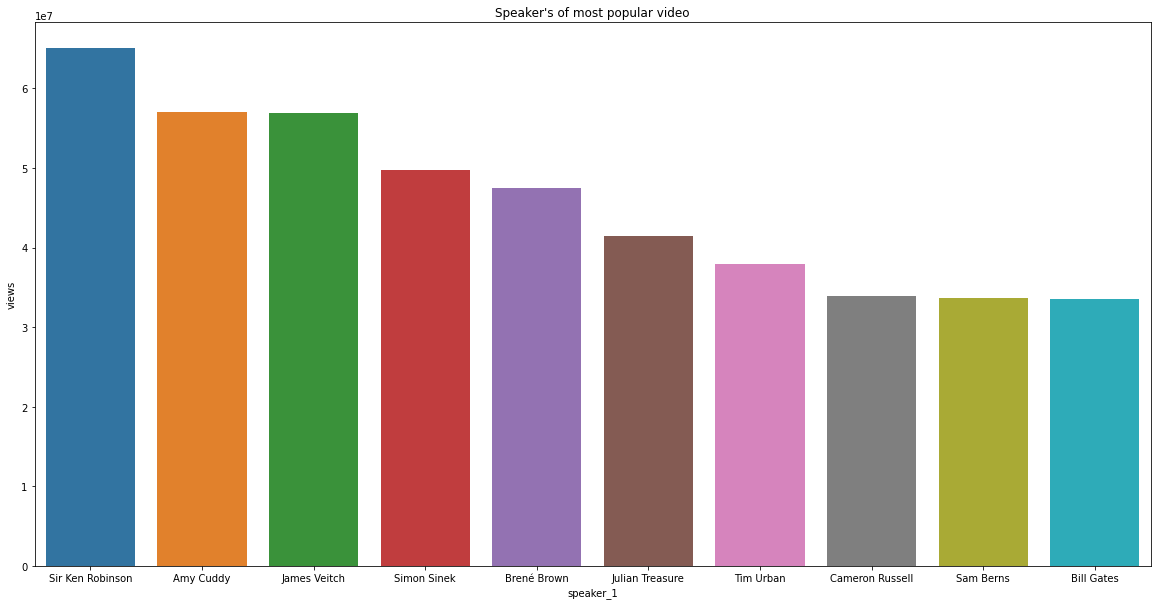

In [85]:
# Plot for most popular videos
plt.figure(figsize=(20,10))
plt.title("Speaker's of most popular video")
sns.barplot(x="speaker_1",y="views",data=pop_df)

##### 1. Why did you pick the specific chart?

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.


##### 2. What is/are the insight(s) found from the chart?

* from the above plot we can see that "Do Schools Kill Creativity?" is the most popular TED Talk of all time with more than 65 million views whose speaker is Sir Ken Robinson.

* If we talk about more than 60 million views then there is only one talk that has crossed 60 million mark while 3 talks have crossed 50 million mark.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes as we can see the video speech by sir ken Robinson, and Amy Cuddy are having huge views because of the view 
it can cause positive impact people will follow more these videos and like, and views will 
automatically increase.


#### Chart - 2 most popular speaker univariate(cat+num)

In [86]:
# Chart - 2 visualization code
# Speaker 1 vs Views
pop_speaker_df=df.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(10,['views'])
pop_speaker_df.reset_index(inplace=True)
pop_speaker_df

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


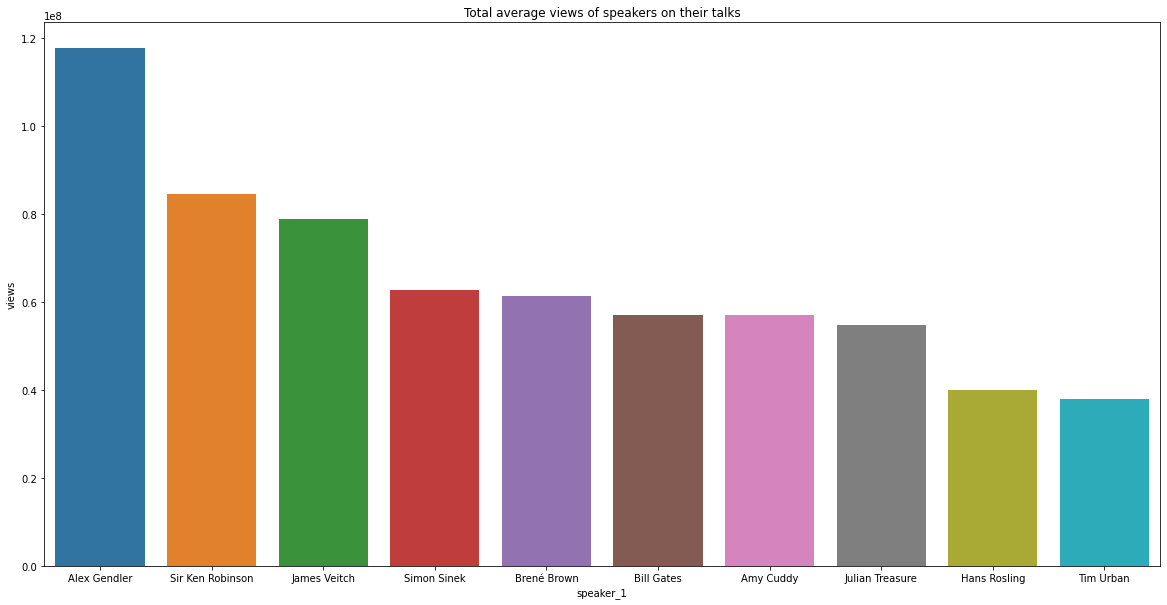

In [87]:
plt.figure(figsize=(20,10))
plt.title("Total average views of speakers on their talks")
sns.barplot(x='speaker_1',y='views',data=pop_speaker_df)

##### 1. Why did you pick the specific chart?

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

##### 2. What is/are the insight(s) found from the chart?

From this graph we can clearly see that Alex Gendler is the most popular speaker.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes as we can see the video speech by sir ken Robinson, and Alex Gendler are having huge average views of their talks because of the view it can cause positive impact people will follow more these videos and like, and views will automatically increase.

#### Chart - 3 Bar plot Most frequent event category univariate

In [88]:
# Chart - 3 visualization code
df["event"].nunique()

459

In [89]:
freq_event_df=df[['event','views']].groupby('event').agg({'views' : 'count'}).nlargest(10,['views'])
freq_event_df.reset_index(inplace=True)
freq_event_df

,event,views
0,TED-Ed,556
1,TED2017,96
2,TED2018,96
3,TED2019,91
4,TED2014,84
5,TED2009,81
6,TED2013,75
7,TED2015,75
8,TED2016,75
9,TED2011,70


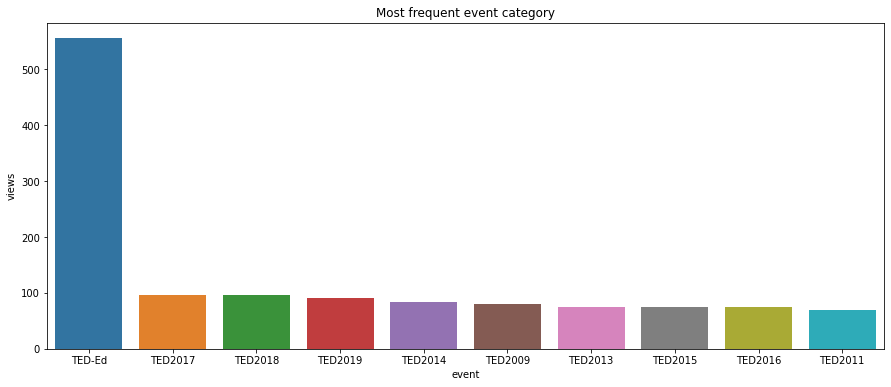

In [90]:
plt.figure(figsize=(15,6))
plt.title('Most frequent event category')
sns.barplot(x='event',y='views',data=freq_event_df)

##### 1. Why did you pick the specific chart?

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

##### 2. What is/are the insight(s) found from the chart?

from this plot we can clearly say that the most frequent event category is TED-Ed

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes somehow not in better way because here many events are having lower view compare to only one event which is ted_ED so ,there is positive business impact only for Ted_Ed .

#### Chart - 4 Bar plot for Checking the msost Popular event category

In [91]:
# Chart - 4 visualization code
pop_event_df = df[["event","views"]].groupby("event").agg({"views":"sum"}).nlargest(10,["views"])
pop_event_df.reset_index(inplace=True)

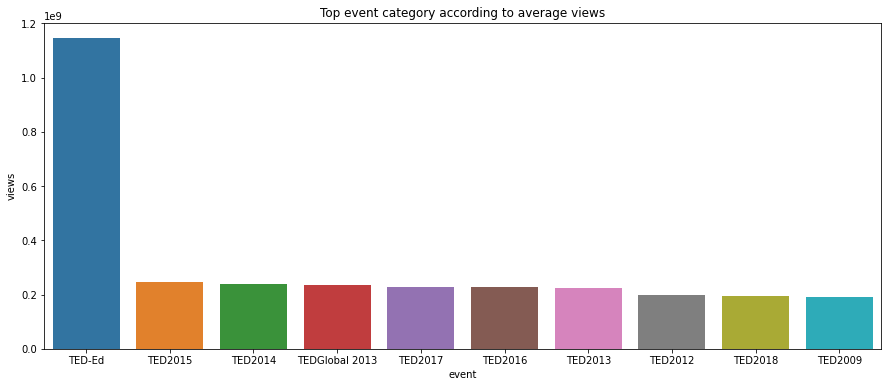

In [92]:
plt.figure(figsize=(15,6))
plt.title('Top event category according to average views')
sns.barplot(x='event',y='views',data=pop_event_df)

##### 1. Why did you pick the specific chart?

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

##### 2. What is/are the insight(s) found from the chart?

from this plot we can say that TED-Ed is the most popular event by having maximum views

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes somehow not in better way because here many events are having lower average view compare to only one event which is ted_ED so ,there is positive business impact only for Ted_Ed 

#### Chart - 5 Word Cloud graph for title Column

There are 157160 words in the combination of all titles.


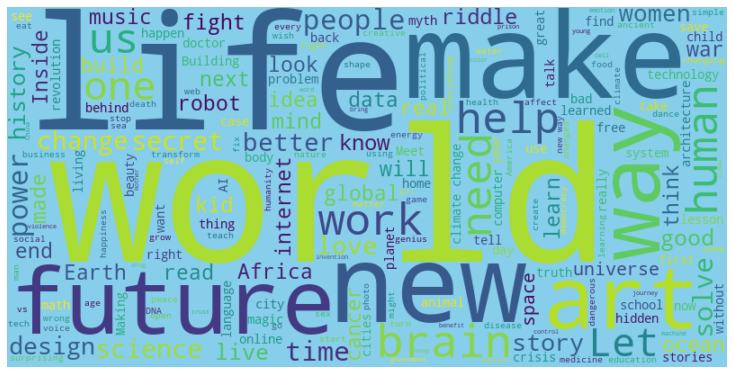

In [93]:
# Chart - 5 visualization code
# Making of word cloud from title column

text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))


# Create and generate a word cloud image:

wordcloud = WordCloud(background_color="skyblue", width=800, height=400).generate(text)

plt.rcParams["figure.figsize"] = (15,5)
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##### 1. Why did you pick the specific chart?

Word clouds or tag clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text.

##### 2. What is/are the insight(s) found from the chart?

Here we can clearly see majority of Titles contains words like world,make,life,future,new,art,help,way

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

not so much here are some Titles which are having a huge impact like the world, and life make which actually increase views and likes but overall Titles have not been watched most and it is not so popular.

#### Chart-6 - word cloud for the most popular Topics

There are 404126 words in the combination of all topics.


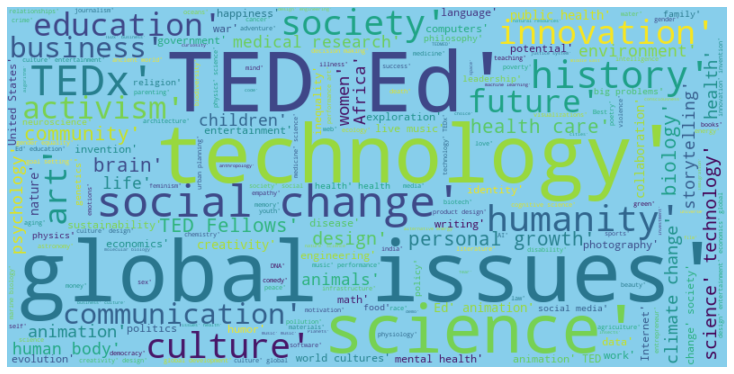

In [94]:
# Chart - 6 visualization code
# Making of word cloud from topics column

text = " ".join(topic for topic in df.topics.astype(str))
print ("There are {} words in the combination of all topics.".format(len(text)))


# Create and generate a word cloud image:

wordcloud = WordCloud(background_color="skyblue", width=800, height=400).generate(text)

plt.rcParams["figure.figsize"] = (15,5)
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##### 1. Why did you pick the specific chart?

Word clouds or tag clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text

##### 2. What is/are the insight(s) found from the chart?

Here Most popular topic tags are TED Ed,technology, global issues, science, humanity

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes some topics are extremely important like technlogy,Ted_ed ,social change which is actually visible and it creates more impact for the scoiety people will watch these particular videos. Some topics like business , nature should be also watched most.

#### Chart - 7 Barplot to show the day of the week having maximum release date

In [95]:
# Chart - 7 visualization code
# Extracting release day, month and year from the published date column
df['release_day'] = df['published_date'].apply(lambda x: x.weekday())
df['release_month']=df['published_date'].apply(lambda x: x.month)
df['release_year'] = df['published_date'].apply(lambda x: x.year)

In [96]:
#Encoding of release_day column with corresponding week day name
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['release_day']=df['release_day'].map(week_day)

In [97]:
#Checking the day of the month having maximum release date
freq_rel_day=df[['release_day','views']].groupby('release_day').agg({'views' : 'count'})
freq_rel_day=freq_rel_day.sort_values('views',ascending=False)
freq_rel_day.reset_index(inplace=True)
freq_rel_day

,release_day,views
0,Tuesday,857
1,Thursday,832
2,Friday,789
3,Monday,727
4,Wednesday,703
5,Sunday,55
6,Saturday,42


In [98]:
# Extarcting release_day and count of views
freq_rel_day=df[['release_day','views']].groupby('release_day').agg({'views' : 'count'})
freq_rel_day=freq_rel_day.sort_values('views',ascending=False)
freq_rel_day.reset_index(inplace=True)
freq_rel_day

,release_day,views
0,Tuesday,857
1,Thursday,832
2,Friday,789
3,Monday,727
4,Wednesday,703
5,Sunday,55
6,Saturday,42


Text(0.5, 1.0, 'Most frequent release days')

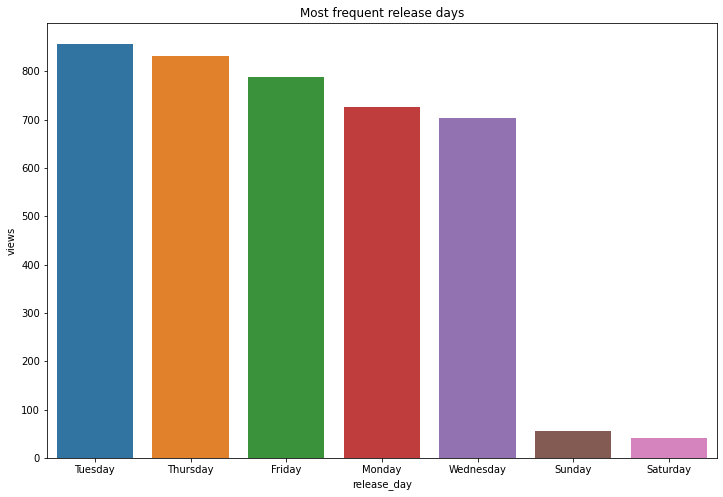

In [99]:
#Plot for most frequent release days
plt.figure(figsize=(12,8))
sns.barplot(x='release_day',y='views',data=freq_rel_day)
plt.title('Most frequent release days')

##### 1. Why did you pick the specific chart?

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

##### 2. What is/are the insight(s) found from the chart?

from this bar plot we can clearly say that  Most videos are published on Tuesday followed by Thursday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes as we can clearly see that most frequent release days is monday,tuesday....expect sat and sat which is having low release days.if frequent release day is these days so there must be chance of huge views and huge following.

#### Chart - 8 Barplot to show released week days having maximum views.

In [100]:
# Chart - 8 visualization 
pop_rel_day=df[['release_day','views']].groupby('release_day').agg({'views' : 'mean'})
pop_rel_day=pop_rel_day.sort_values('views',ascending=False)
pop_rel_day.reset_index(inplace=True)

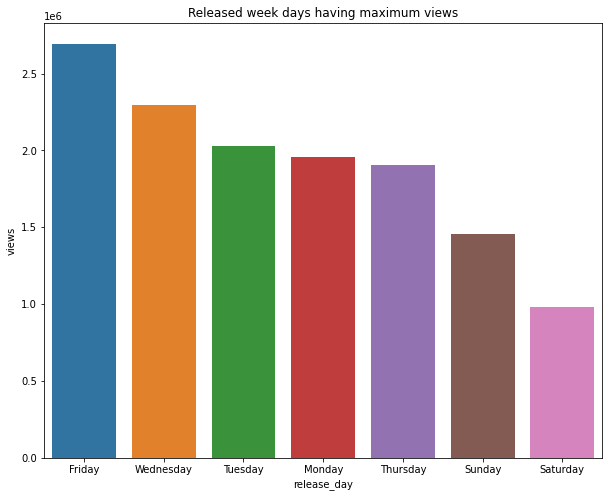

In [101]:
plt.figure(figsize=(10,8))
plt.title('Released week days having maximum views')
sns.barplot(x='release_day',y='views',data=pop_rel_day)

##### 1. Why did you pick the specific chart?

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

##### 2. What is/are the insight(s) found from the chart?

Most videos are published on Tuesday followed by Thursday.
Friday release is impacting the views of the video

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes here Friday release is impacting the views of the video,due to high views it will definitely impact business.

#### Chart - 9 Barplot showing month having most frequent release.

In [102]:
# Chart - 9 visualization code
#Encoding of release_month column with corresponding month name
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['release_month']=df['release_month'].map(month_dict)

In [103]:
# Let's check months having maximum release
freq_rel_month=df[['release_month','views']].groupby('release_month').agg({'views' : 'count'})
freq_rel_month=freq_rel_month.sort_values('views',ascending=False)
freq_rel_month.reset_index(inplace=True)

Text(0.5, 1.0, 'Most frequent release months')

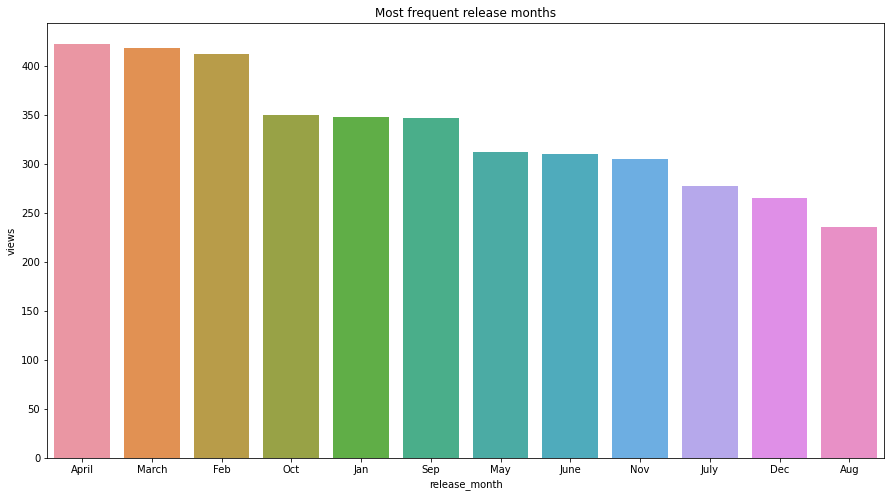

In [104]:
plt.figure(figsize=(15,8))
sns.barplot(x='release_month',y='views',data=freq_rel_month)
plt.title('Most frequent release months')

##### 1. Why did you pick the specific chart?

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

##### 2. What is/are the insight(s) found from the chart?

Most videos are released in April followed by March and Feb.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes For each month views are somehow performing well it is creating positive growth.

#### Chart - 10 Barplot showing months having maximum average views.

In [105]:
#Checking the most popular release month according to average Views
pop_rel_month=df[['release_month','views']].groupby('release_month').agg({'views' : 'mean'})
pop_rel_month=pop_rel_month.sort_values('views',ascending=False)
pop_rel_month.reset_index(inplace=True)

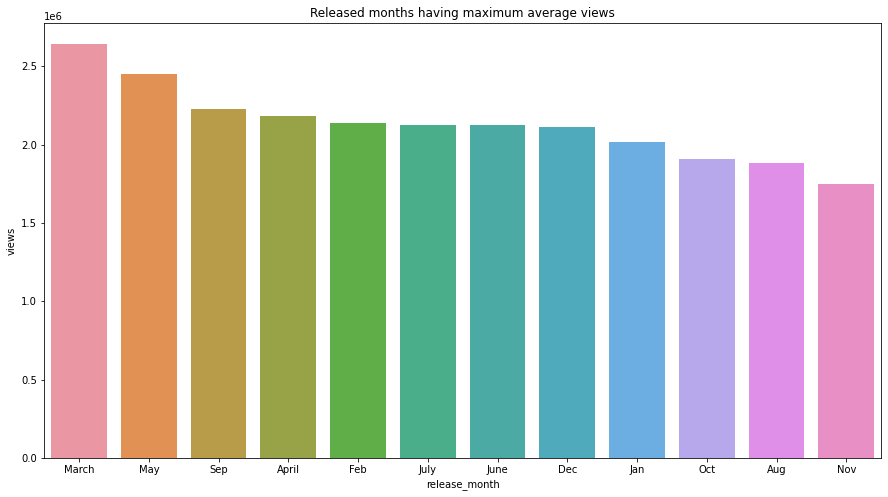

In [106]:
# Chart - 10 visualization code
plt.figure(figsize=(15,8))
plt.title('Released months having maximum average views')
sns.barplot(x='release_month',y='views',data=pop_rel_month)

##### 1. Why did you pick the specific chart?

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

##### 2. What is/are the insight(s) found from the chart?

Videos released in March month are more popular i.e. have more average views.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes For each month average views are somehow performing well it is creating positive growth and we can clearly see that there are not so much differnce after may.

#### Chart - 11 Barplot to show most frequent release year




In [107]:
# Chart - 11 visualization code
freq_rel_year=df[['release_year','views']].groupby('release_year').agg({'views' : 'count'})
freq_rel_year=freq_rel_year.sort_values('views',ascending=False)
freq_rel_year.reset_index(inplace=True)


Text(0.5, 1.0, 'Most frequent release years')

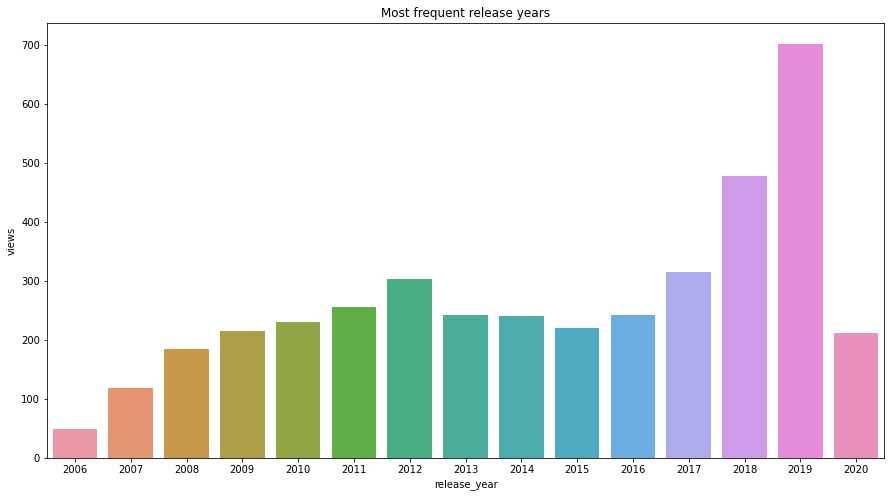

In [108]:
# Most frequenr Release Year
plt.figure(figsize=(15,8))
sns.barplot(x='release_year',y='views',data=freq_rel_year)
plt.title('Most frequent release years')

##### 1. Why did you pick the specific chart?

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

##### 2. What is/are the insight(s) found from the chart?

by looking this plot we can clearly say that Most videos are published in 2019 followed by 2018.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes for 2019 there would have been huge views because of frequent release and it shows positve growth for 2019.

#### Chart - 12 Barplot to show year which have maximum average views.

In [109]:
# Extracting the most popular release years w.r.t. average Views
pop_rel_year=df[['release_year','views']].groupby('release_year').agg({'views' : 'mean'})
pop_rel_year=pop_rel_year.sort_values('views',ascending=False)
pop_rel_year.reset_index(inplace=True)

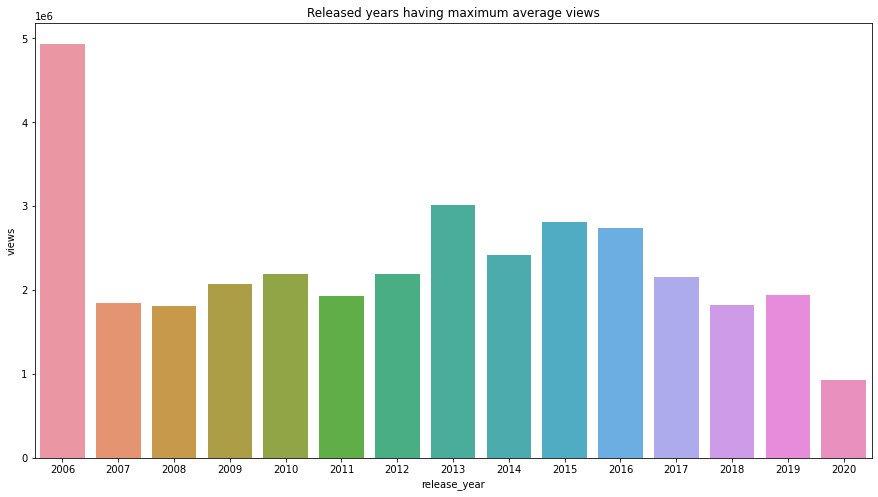

In [110]:
# Chart - 12 visualization code
plt.figure(figsize=(15,8))
plt.title('Released years having maximum average views')
sns.barplot(x='release_year',y='views',data=pop_rel_year)

##### 1. Why did you pick the specific chart?

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

##### 2. What is/are the insight(s) found from the chart?

here we can see that Videos published in 2006 have high number of views.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes Expect 2006 for the release year views on average performing well and there would have been some some good topics and titles for 2006 so the views we can see is very high

#### Chart - 13 Plotting Distplot of views column(Univariate(cat,num),(num,num))

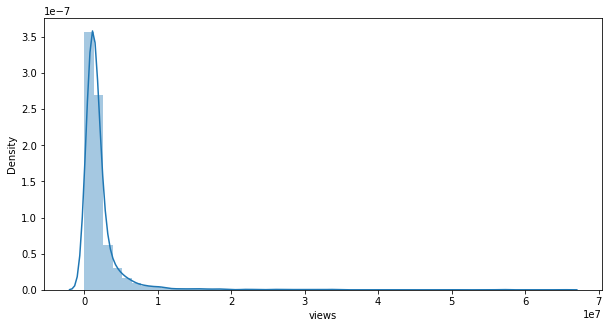

In [111]:
# Chart - 13 visualization code
#distplot of views column
plt.figure(figsize=(10,5))
sns.distplot(df['views'])

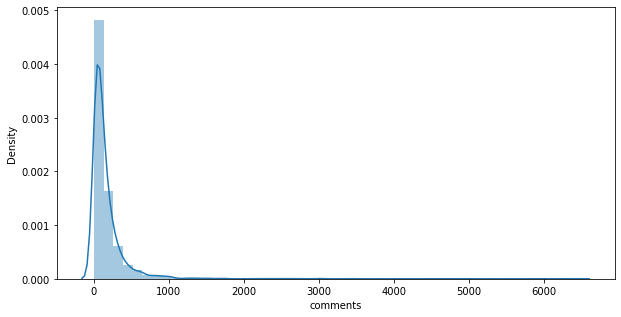

In [112]:
# Plotting Distplot of comments column
plt.figure(figsize=(10,5))
sns.distplot(df['comments'])

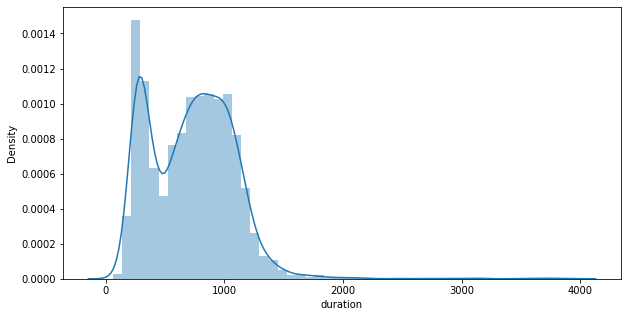

In [113]:
#distplot of duration column
plt.figure(figsize=(10,5))
sns.distplot(df['duration'])

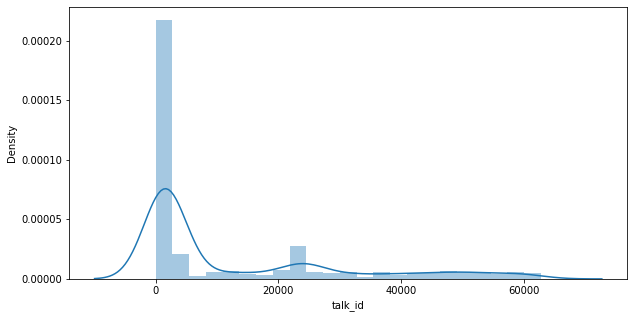

In [114]:
# Distplot of Talk_id column
plt.figure(figsize=(10,5))
sns.distplot(df['talk_id'])

#### 1. Why did you pick the specific chart?

Seaborn distplot lets you show a histogram with a line on it. This can be    shown in all kinds of variations. We use seaborn in combination with    matplotlib, the Python plotting module.

A distplot plots a univariate distribution of observations. 

#### 2. What is/are the insight(s) found from the chart?

so,here the distribution of target variable is rightly skewed.

The distribution of comments column is also rightly skewed.

The distribution of duration column is also rightly skewed.

The distribution of talk_id column is also rightly skewed.

#### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes the insights we got creating positive impact as we can see most of the distplot showing positive skewed and there is some huge views , huge comments.

#### Chart - 14 - Correlation Heatmap

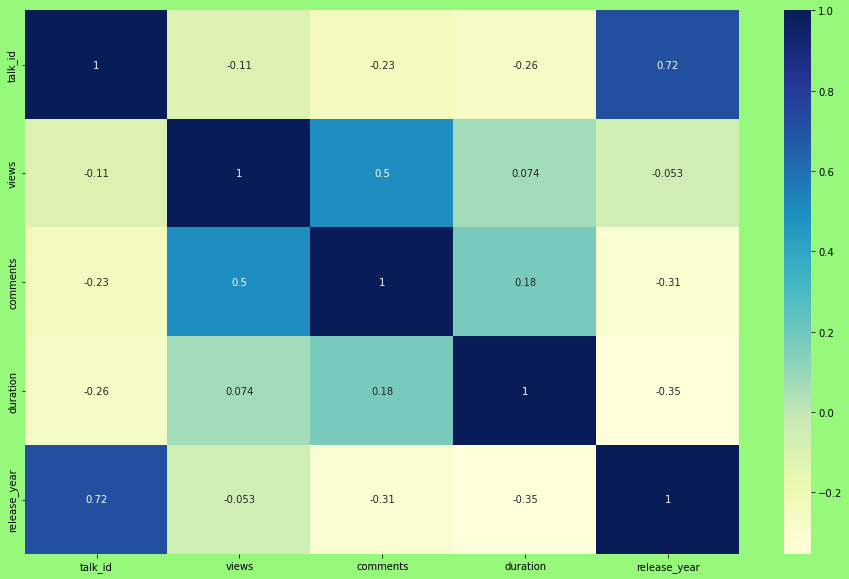

In [115]:
# Correlation Heatmap visualization code
fig = plt.figure(figsize=(16,10),edgecolor='k',facecolor='xkcd:light green')
ax = fig.add_subplot(111)
sns.heatmap(df.corr(),annot=True, cmap='YlGnBu')

##### 1. Why did you pick the specific chart?

Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

##### 2. What is/are the insight(s) found from the chart?

There are some negative correlation as well as positve correlation .There is high correlation between release_year and talk_id and low correlation between views and release_year.

#### Chart - 15 - Pair Plot 

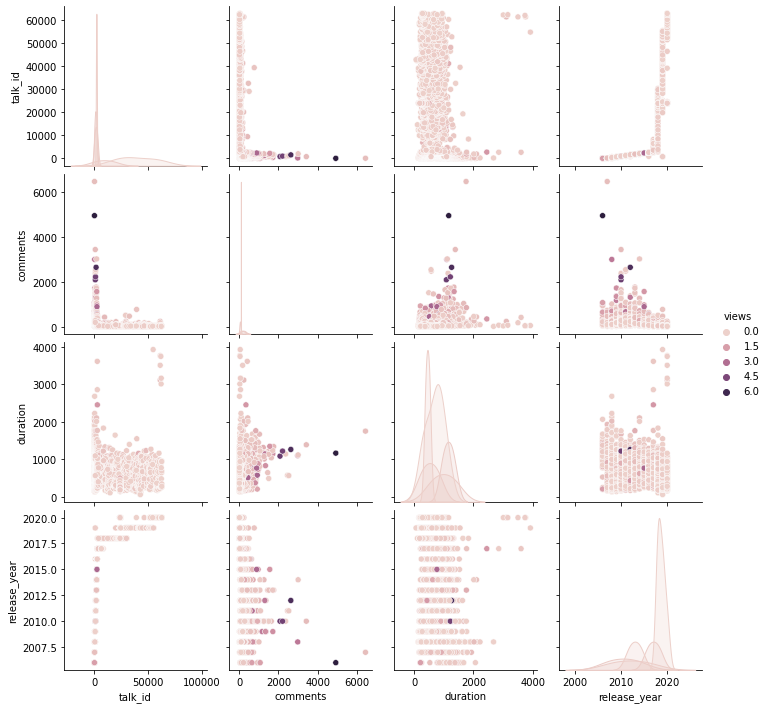

In [116]:
# Pair Plot visualization code
sns.pairplot(df, hue="views")

##### 1. Why did you pick the specific chart?

The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure. This is essential when we are exploring our dataset and trying to become familiar with it.

##### 2. What is/are the insight(s) found from the chart?

from this plot we can observe some features wr.t target variable are performing well creating normal distribution curve like duration and views and some are highly uncorrelated.Some are having huge outliers as well

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [117]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [118]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [119]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

Feature engineering is the process of using domain knowledge to extract features from row data .These features can be used to improve the performance of machine learning algorithms.

Feature Engineering on Speaker_1 column

Let's perform target encoding on speaker_1 column and create a new column speaker_1_avg_views


In [120]:
# Target encoding on speaker_1 column.
pop_speaker=df.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_speaker=pop_speaker.to_dict()
pop_speaker=pop_speaker.values()
pop_speaker=  list(pop_speaker)[0]
df['speaker_1_avg_views']=df['speaker_1'].map(pop_speaker)

Let's check the distribution of newly created column.

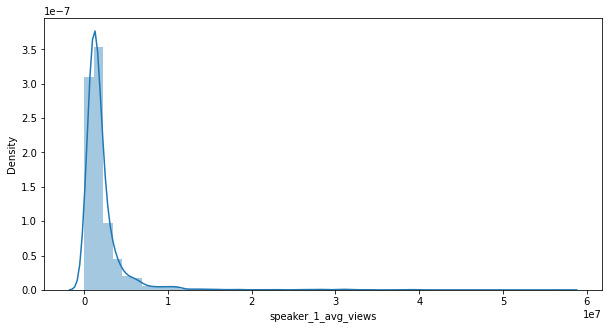

In [121]:
#Distribution of speaker_1_avg_views column
plt.figure(figsize=(10,5))
sns.distplot(df['speaker_1_avg_views'])

We can see that the distribution of speaker_1_avg_views column is rightly skewed same as target variable.

Let's perform Feature Engineering on event column

The event column contains lots of similar values so let's combine them in a same category.

In [122]:
# Printing unique event categories.
event_list=list(df.event.unique())
print(event_list)

['TED2006', 'TED2004', 'TED2005', 'TEDGlobal 2005', 'TEDSalon 2006', 'TED2003', 'TED2007', 'TED2002', 'TEDGlobal 2007', 'TED2001', 'TEDSalon 2007 Hot Science', 'Skoll World Forum 2007', 'TED2008', 'TED1984', 'TED1990', 'DLD 2007', 'EG 2007', 'TED1998', 'LIFT 2007', 'TED Prize Wish', 'TEDSalon 2009 Compassion', 'Chautauqua Institution', 'Serious Play 2008', 'Taste3 2008', 'TED in the Field', 'TED2009', 'EG 2008', 'Elizabeth G. Anderson School', 'TEDxUSC', 'TED@State', 'TEDGlobal 2009', 'TEDxKC', 'TEDIndia 2009', 'TEDSalon London 2009', 'TEDxTC', 'TEDMED 2009', 'TEDxSMU', 'TEDxBoston 2009', 'TEDxBerlin', 'TED2010', 'TEDxAmsterdam', 'TEDxNASA', 'Mission Blue Voyage', 'TEDxPuget Sound', 'TEDxNYED', 'TEDSalon London 2010', 'TEDxEdmonton', 'TED@Cannes', 'TEDxAtlanta', 'TEDxEast', 'TEDxOilSpill', 'TEDGlobal 2010', 'TEDxBoston 2010', 'Business Innovation Factory', 'TEDxYYC', 'TEDxChange', 'TED Senior Fellows at TEDGlobal 2010', 'TEDxTelAviv 2010', 'TEDxDU 2010', 'TEDxMidwest', 'TEDxHouston', '

Let's perform target encoding on event column and create a new column event_wise_avg_views

In [123]:
#Target encoding on event column
pop_event=df.groupby('event').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_event=pop_event.to_dict()
pop_event=pop_event.values()
pop_event=  list(pop_event)[0]
df['event_wise_avg_views']=df['event'].map(pop_event)

Let's check the distribution of newly created column.

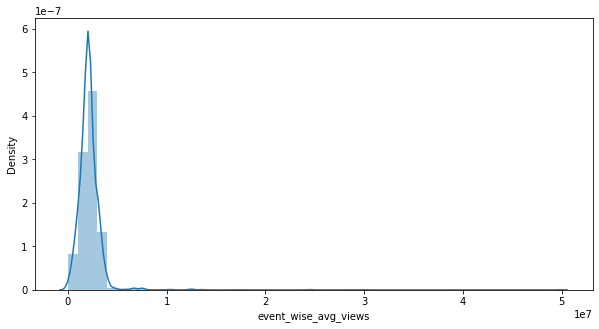

In [124]:
#Distribution of event_wise_avg_views column
plt.figure(figsize=(10,5))
sns.distplot(df['event_wise_avg_views'])

The distribution of event_wise_avg_views column is rightly skewed same as target variable.

In [125]:
# Now, we can drop the event column now as it is of no use.
df=df.drop(columns='event')

###Feature Engineering on available_lang column

In available_lang column we have a list of available languages for each video.

In [126]:
# Applying eval function on available_lang column
df['available_lang'] = df.apply(lambda row: eval(row['available_lang']), axis=1)

Let's add a new feature 'num_of_lang' which contain the count of total no of language for a particular video.

In [127]:
#Adding new feature num_of_lang
df['num_of_lang'] = df.apply(lambda x: len(x['available_lang']), axis=1)

Now, we can drop available_lang column.

In [128]:
# Dropping the available_lang column
df.drop(columns='available_lang',inplace=True)

#**Feature Engineering on topics column**

The topics column contains the list of topic tags associated with each video.

we will add a new feature 'num_of_tags' which contain the count of total no of topics for a particular video.

In [129]:
df['topics'][0]

"['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"

In [130]:
#Applying Eval funcion on topics column
df['topics'] = df.apply(lambda row: eval(row['topics']), axis=1)

In [131]:
# Creating a new feature num_of_tags
df['num_of_tags'] = df.apply(lambda x: len(x['topics']), axis=1)

#**let's perform target encoding on topics column.**

In [132]:
#Extracting the unique topics from topics list of each talk
unique_topics=[]
for i in range(0,len(df)):
  temp=df['topics'][i]
  for ele in temp:
    if(ele not in unique_topics):
      unique_topics.append(ele)

In [133]:
# Extracting the avg views with respect to each topic in another dict unique_topics_avg_view_dict
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(df)):
    temp2=df['topics'][i]
    if(topic in temp2):
      temp+=df['views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

In [134]:
# Storing the avg views with respect to topic for each talk
topics_wise_avg_views=[]
for i in range(0,len(df)):
  temp=0
  temp_topic=df['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]
  
  topics_wise_avg_views.append(temp//len(temp_topic))

se = pd.Series(topics_wise_avg_views)
df['topics_wise_avg_views'] = se.values

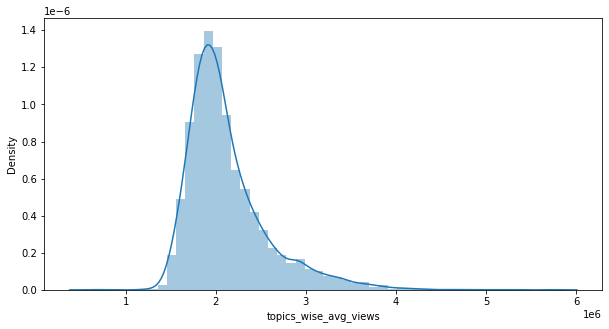

In [135]:
# Distribution of topics_wise_avg_views
plt.figure(figsize=(10,5))
sns.distplot(df['topics_wise_avg_views'])

#**Feature Engineering on published_date column.**

Let's create a new column called video_age which is the difference of current year and released year.

Then we can drop published_date column.

In [136]:
#Adding new feature video_age
df['video_age']=2021-df['release_year']

In [137]:
#Now, drop published_date column
df=df.drop(columns='published_date')

#**Feature Engineering on related_talks column.**

Related_talks column contains a dictionary with talk_id as key and video title as it's value.

Then we will create a new feature related_views which contains mean of the views of related talks for each video .

In [138]:
#applying eval function on related_talks column
df['related_talks'] = df.apply(lambda row: eval(row['related_talks']), axis=1)

In [139]:
# Creating a new feature called related_views
df['related_views'] = 0

In [140]:
#Extracting the value of related_talks
for index, row in df.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(df)):
      if (df.loc[i,'talk_id']) in id_list:
        temp+=df.loc[i,'views']

    df.loc[index,'related_views']=temp//6

checking the distribution of related_views column.

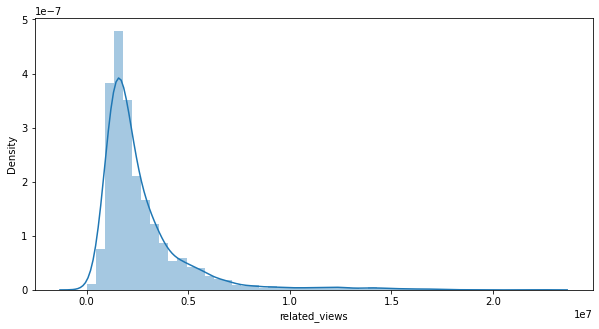

In [141]:
# Distplot to show the distribution of related_views column
plt.figure(figsize=(10,5))
sns.distplot(df['related_views'])

Here Related_views column is rightly skewed.

### 1. Handling Missing Values

In [142]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

talk_id                    0
title                      0
speaker_1                  0
all_speakers               4
occupations              522
about_speakers           503
views                      0
recorded_date              1
native_lang                0
comments                 655
duration                   0
topics                     0
related_talks              0
url                        0
description                0
transcript                 0
release_day                0
release_month              0
release_year               0
speaker_1_avg_views        0
event_wise_avg_views       0
num_of_lang                0
num_of_tags                0
topics_wise_avg_views      0
video_age                  0
related_views              0
dtype: int64

In [143]:
# Dropping unimportant columns from the dataframe.
df.drop(columns=['talk_id','title','speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'recorded_date','topics','related_talks','transcript','description','release_year','url','native_lang'],inplace=True)

In [144]:
# Now Printing total number of missing values.
df.isnull().sum()

views                      0
comments                 655
duration                   0
release_day                0
release_month              0
speaker_1_avg_views        0
event_wise_avg_views       0
num_of_lang                0
num_of_tags                0
topics_wise_avg_views      0
video_age                  0
related_views              0
dtype: int64

Now using KNNImputer for Imputing nan values of numerical columns .

In [145]:
# Importing KNNImputer library to impute nan values
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit(df[['comments']])
df[['comments']] = imputer.transform(df[['comments']])

In [146]:
# Let's see if there are any nan values in comments column
df[['comments']].isna().sum()

comments    0
dtype: int64

finally we have removed all the null values from our numerical columns.

#### What all missing value imputation techniques have you used and why did you use those techniques?

I used KNN impuatation technique.Our dataset contains around 400 null
values which might tend to disturb
our mean absolute score hence we
have performed KNN nan value
imputer for numerical features and

replaced categorical features nan
values with the value ‘Other’. We
chose to impute nan values and not
drop them due to the size of the data
set

### 2. Handling Outliers

Printing total number of outliers

Q1 - 1.5 * IQR = Lower Fence

Q3 + 1.5 * IQR = Upper Fence

In [147]:
# Handling Outliers & Outlier treatments
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

comments                 361
duration                  21
event_wise_avg_views     156
num_of_lang              121
num_of_tags              116
related_views            300
release_day                0
release_month              0
speaker_1_avg_views      373
topics_wise_avg_views    242
video_age                  0
views                    393
dtype: int64

In [148]:
# Now Replacing outliers with extreme values
for i in ['comments','duration','num_of_lang','num_of_tags','related_views','views','speaker_1_avg_views','topics_wise_avg_views','event_wise_avg_views']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  df[i]=np.where(df[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(df[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),df[i]))

In [149]:
# Let's check the outliers again
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

comments                 0
duration                 0
event_wise_avg_views     0
num_of_lang              0
num_of_tags              0
related_views            0
release_day              0
release_month            0
speaker_1_avg_views      0
topics_wise_avg_views    0
video_age                0
views                    0
dtype: int64

Finally we have removed all outliers from our numerical columns.

##### What all outlier treatment techniques have you used and why did you use those techniques?

We have done outlier treatment on
variables like duration and
occupation. This was done by
replacing outliers with the extreme
values at the first and third quartiles.
We have done outlier treatment to
prevent high errors that were
influenced by outliers.
The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 — Q1) is called the interquartile range or IQ. A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:

lower inner fence: Q1–1.5*IQ

upper inner fence: Q3 + 1.5*IQ

lower outer fence: Q1–3*IQ

upper outer fence: Q3 + 3*IQ

### 3. Categorical Encoding

In [150]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

We used Target Encoding for
replacing the values of categorical
variables with the mean of the views.
This was done to not increase the
dimensions to the data set while also
keeping the relationship of variables
with views into consideration.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [151]:
# Expand Contraction

#### 2. Lower Casing

In [152]:
# Lower Casing

#### 3. Removing Punctuations

In [153]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [154]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [155]:
# Remove Stopwords

In [156]:
# Remove White spaces

#### 6. Rephrase Text

In [157]:
# Rephrase Text

#### 7. Tokenization

In [158]:
# Tokenization

#### 8. Text Normalization

In [159]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [160]:
# POS Taging

#### 10. Text Vectorization

In [161]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [162]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

Let's separate the dependent and independent variables.

In [163]:
# Select your features wisely to avoid overfitting
#Separating the dependent(y) and independent(X) variables
X=df.drop(columns='views')
y=df['views']

In [164]:
# One hot encoding on independent features.
X=pd.get_dummies(X)
X.shape

(4005, 28)

Let's perform feature selection from these 28 independent variables and select the best set of features.

Feature selection using f_regression.

In [165]:
# Calculating f scores of each features
f_scores = f_regression(X, y)

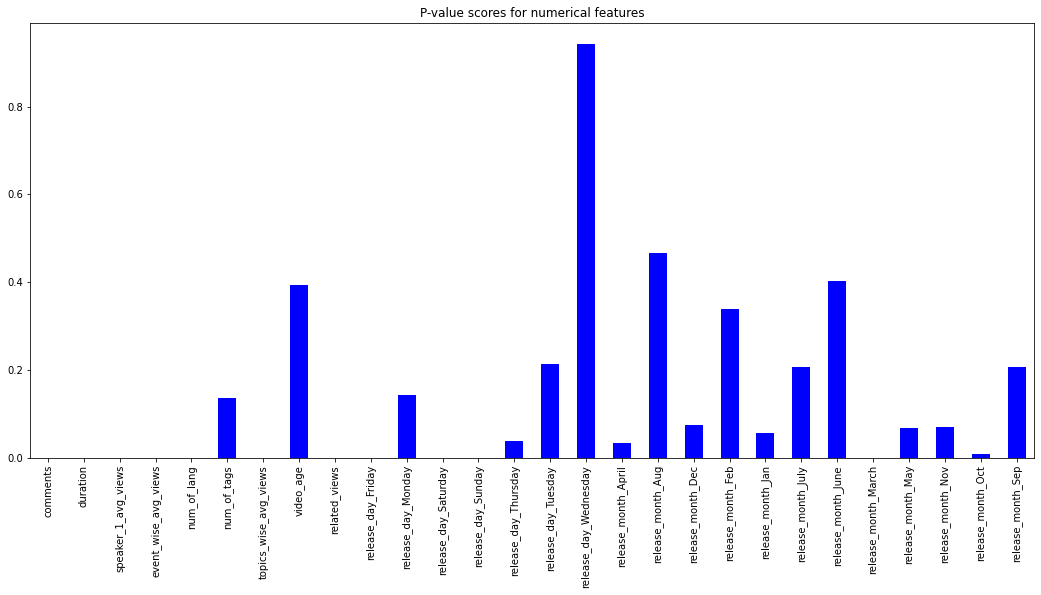

In [166]:
# Let's plot the f scores of independent variable
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='blue',figsize=(18,8))
plt.title('P-value scores for numerical features')
plt.show()

We can drop some features which have high p_values.

##### What all feature selection methods have you used  and why?

For Feature Selection we have done
the following: we have introduced
new numerical features from the
categorical features,combined
features and also we have used
f_regression in which we have taken

the features with the maximum f-
scores.

##### Which all features you found important and why?

Features like ['comments', 'duration', 'num_of_lang','event_wise_avg_views','related_views', 'release_day_Friday','speaker_1_avg_views','topics_wise_avg_views','release_day_Saturday','release_day_Sunday','release_month_March'] are important because for these we don't have high p value , so we take those feature which is having low p value for our model evaluation

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

### 6. Data Scaling

In [212]:
# Let's make a list of important features.
X=X[['comments', 'duration', 'num_of_lang','event_wise_avg_views','related_views', 'release_day_Friday','speaker_1_avg_views','topics_wise_avg_views','release_day_Saturday','release_day_Sunday','release_month_March']]

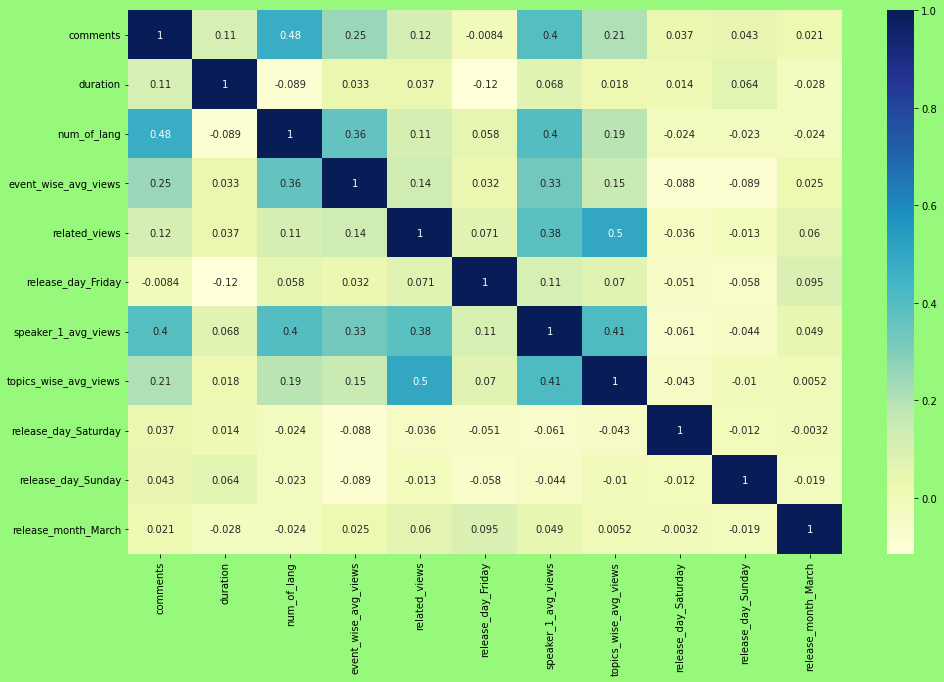

In [213]:
#Plotting the correlation matrix
#Correlation matrix of numerical features.
fig = plt.figure(figsize=(16,10),edgecolor='k',facecolor='xkcd:light green')
ax = fig.add_subplot(111)
sns.heatmap(X.corr(),annot=True, cmap='YlGnBu')

In [169]:
#Applying Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [170]:
# Scaling your data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

I have used standarad scaler method for scaling data.StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [171]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [172]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [173]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 

###**Regression models and HyperParameter Tuning**
Random Forest Regressor

In [174]:
# ML Model - 1 Implementation
rf = RandomForestRegressor(criterion='mae')
# Fit the Algorithm
rf.fit(X_train, y_train)
# Predict on the model
y_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 94131.96
Test MAE: 231928.28


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [175]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [178]:
#Random Forest Regressor hyperparameters.

# Number of trees
n_estimators = [80,100,120,150]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,80,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,30,40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [180]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rf_model = RandomForestRegressor(criterion='mae')
#RandomSearch
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=0,cv=5)
# Fit the Algorithm
rf_random.fit(X_train,y_train)
# Predict on the model

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(criterion='mae'),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [10, 30, 40, 50],
                                        'min_samples_split': [50, 80, 100],
                                        'n_estimators': [80, 100, 120, 150]})

In [181]:
# Let's see which set of hyperparameters are optimal
rf_optimal_model = rf_random.best_estimator_
rf_optimal_model

RandomForestRegressor(criterion='mae', max_depth=6, min_samples_leaf=10,
                      min_samples_split=50, n_estimators=120)

So, above are the best hyperparameters for our model.

###Calculating the MAE on train and test set

In [182]:
#Calculating the MAE on train and test set
y_pred = rf_optimal_model.predict(X_train)
y_test_pred = rf_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 179899.71
Test MAE: 190630.71


In [183]:
# Making predictions for test data and also calculating r2_score
y_hat = rf_optimal_model.predict(X_test)
print(f'R_squared value for train: {rf_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)


#Calculating Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for RFforest is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

R_squared value for train: 0.8353090130082459
For test set the R_Squared for RFforest is 0.8134344782079216 and adjusted R_Squared is 0.8129205236024337


In [184]:

# Now let's store all the scores in a dataframe
rf=RandomForestRegressor(criterion='mae',max_depth=6,min_samples_leaf=30,min_samples_split=80,n_estimators=150,random_state=42)
rf_optimal_model=rf.fit(X_train,y_train)
model_data=[]
model_dict={}
model_dict["Model_Name"] = 'RandomForestRegressor'
model_dict["MAE_train"] =mean_absolute_error(y_train, rf_optimal_model.predict(X_train))
model_dict["MAE_test"] =mean_absolute_error(y_test, rf_optimal_model.predict(X_test))
model_dict["R2_Score_train"] = r2_score(y_train,rf_optimal_model.predict(X_train))
model_dict["R2_Score_test"] = r2_score(y_test,rf_optimal_model.predict(X_test))
model_dict["RMSE_train"] = np.sqrt(mean_squared_error(y_train,rf_optimal_model.predict(X_train)))
model_dict["RMSE_test"] = np.sqrt(mean_squared_error(y_test,rf_optimal_model.predict(X_test)))
model_data.append(model_dict)

results_df_rf = pd.DataFrame(model_data)

In [185]:
# Printing the results_df_rf
results_df_rf

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_train,RMSE_test
0,RandomForestRegressor,186755.615047,192512.213794,0.806505,0.802615,484980.885988,489710.718664


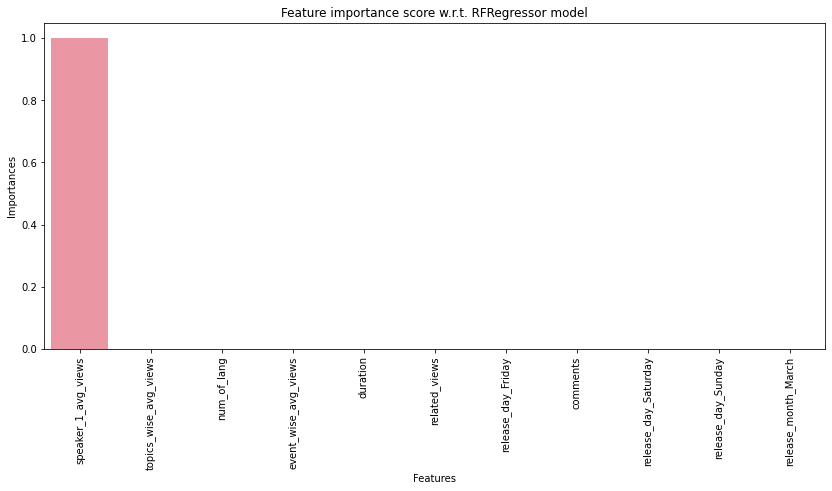

In [186]:
# Feature importance score w.r.t. RF model
# Plotting Barplot showing important features w.r.t. RF model
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': rf_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 6))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. RFRegressor model')
plt.show()

So,here speaker_1_avg_views is the most important feature in RandomForestregressor.

##### Which hyperparameter optimization technique have you used and why?

 I have used RandomizedSearch CV definining Criterian mode with MAE(mean absoulte eroor) . In
Random Search, the hyperparameters
are chosen at random within a range
of values that it can assume. The
advantage of this method is that there
is a greater chance of finding regions
of the cost minimization space with
more suitable hyperparameters, since
the choice for each iteration is
random. The disadvantage of this
method is that the combination of
hyperparameters is beyond the
scientist’s control

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#**XGboost Regressor model**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [187]:
# Visualizing evaluation Metric Score chart

In [188]:
#XGBoost Regressor hyperparameters

# Number of trees
n_estimators = [30,50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [30,40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

#### 2. Cross- Validation & Hyperparameter Tuning

In [189]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Create an instance of the XGBoost
xgb_model = XGBRegressor(learning_rate=0.1)
# Fit the Algorithm
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)
xgb_random.fit(X_train,y_train)
# Predict on the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[06:02:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=50; total time=   0.2s
[06:02:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=50; total time=   0.1s
[06:02:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=50; total time=   0.1s
[06:02:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=50; total time=   0.1s
[06:02:13] WARNING: /wo

RandomizedSearchCV(cv=5, estimator=XGBRegressor(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [30, 40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [30, 50, 80, 100]},
                   verbose=2)

In [190]:
# Let's see which set of hyperparameters are optimal
xgb_optimal_model = xgb_random.best_estimator_
xgb_optimal_model

XGBRegressor(max_depth=4, min_samples_leaf=50, min_samples_split=100,
             n_estimators=50)

In [191]:
# Making predictions for test data and also calculating r2_score.

y_hat = xgb_optimal_model.predict(X_test)
print(f'r_squared value for train: {xgb_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)

# Calculating Adjusted R-sqaured

adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for XGBoost is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_squared value for train: 0.901248189420735
For test set the R_Squared for XGBoost is 0.8316184570520815 and adjusted R_Squared is 0.831154596052225


In [192]:
# Calculating MAE for training and test set.
y_pred = xgb_optimal_model.predict(X_train)
y_test_pred = xgb_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 175948.22
Test MAE: 221000.07


In [195]:
# storing all the scores in a dataframe
xgb=XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=3, min_samples_leaf=40,
             min_samples_split=40, n_estimators=40)
xgb_optimal_model=xgb.fit(X_train,y_train)
model_data=[]
model_dict={}
model_dict["Model_Name"] = 'XGBRegressor'
model_dict["MAE_train"] =mean_absolute_error(y_train, xgb_optimal_model.predict(X_train))
model_dict["MAE_test"] =mean_absolute_error(y_test, xgb_optimal_model.predict(X_test))
model_dict["R2_Score_train"] = r2_score(y_train,xgb_optimal_model.predict(X_train))
model_dict["R2_Score_test"] = r2_score(y_test,xgb_optimal_model.predict(X_test))
model_dict["RMSE_train"] = np.sqrt(mean_squared_error(y_train,xgb_optimal_model.predict(X_train)))
model_dict["RMSE_test"] = np.sqrt(mean_squared_error(y_test,xgb_optimal_model.predict(X_test)))
model_data.append(model_dict)

results_df_xgb = pd.DataFrame(model_data)

[06:03:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [196]:
# Printing the results_df_xgb
results_df_xgb

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_train,RMSE_test
0,XGBRegressor,211051.556655,228812.768108,0.866211,0.832566,403273.960146,451028.530993


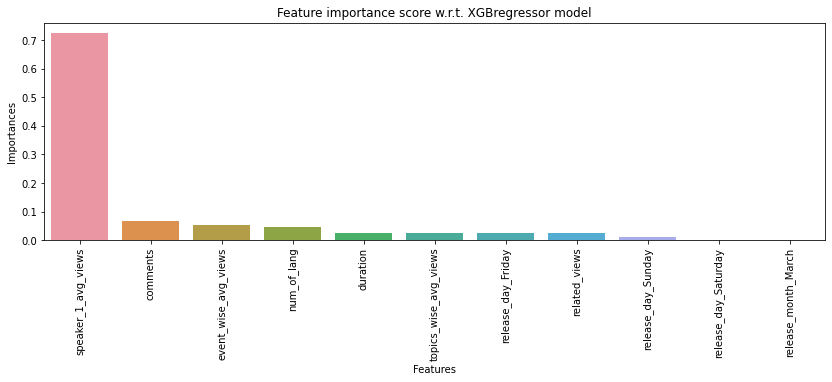

In [197]:
# Let's plot the feature importance score w.r.t. XGBRegressor model
#Barplot showing important features w.r.t. XGBregressor model
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': xgb_optimal_model.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. XGBregressor model')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I have used RandomizedSearch CV defining XGB model with learning rate = 0.1. In Random Search, the hyperparameters are chosen at random within a range of values that it can assume. The advantage of this method is that there is a greater chance of finding regions of the cost minimization space with more suitable hyperparameters, since the choice for each iteration is random. The disadvantage of this method is that the combination of hyperparameters is beyond the scientist’s control

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

#**ExtraTrees Regressor.**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

In [198]:
#Extra Trees Regressor hyperparameters tuning

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

#### 2. Cross- Validation & Hyperparameter Tuning

In [199]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
et_model = ExtraTreesRegressor(criterion='mae')

# Fit the Algorithm
et_random = RandomizedSearchCV(et_model,param_dict,verbose=2,cv=5)

# Fit the Algorithm
et_random.fit(X_train,y_train)
# Predict on the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   7.0s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   6.9s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   6.9s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   7.0s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   6.8s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   3.3s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   3.3s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   3.3s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   3.3s
[CV] END max_dep

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(criterion='mae'),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   verbose=2)

In [200]:
# Let's see optimal set of hyperparameters for this model
et_optimal_model = et_random.best_estimator_
et_optimal_model

ExtraTreesRegressor(criterion='mae', max_depth=6, min_samples_leaf=40,
                    min_samples_split=50, n_estimators=50)

In [201]:
# Calculating MAE for training and test set
y_pred = et_optimal_model.predict(X_train)
y_test_pred = et_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 205534.89
Test MAE: 202450.49


In [202]:
y_pred = et_optimal_model.predict(X_train)
y_test_pred = et_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 205534.89
Test MAE: 202450.49


In [203]:
# Making predictions for test data and also calculating r2_score

y_hat = et_optimal_model.predict(X_test)
print(f'r_squared value for train: {rf_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)

#Calculate Adjusted R-sqaured

adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test the R_Squared for ExtraTreesRegressor is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_squared value for train: 0.8065049876728183
For test the R_Squared for ExtraTreesRegressor is 0.8070113587729949 and adjusted R_Squared is 0.8064797096236092


In [204]:
# Let's store all the scores in a dataframe
et=ExtraTreesRegressor(criterion='mae',max_depth=8, min_samples_leaf=50,min_samples_split=100, n_estimators=50)
et_optimal_model=et.fit(X_train,y_train)
model_data=[]
model_dict={}
model_dict["Model_Name"] = 'ExtraTreeRegressor'
model_dict["MAE_train"] =mean_absolute_error(y_train, et_optimal_model.predict(X_train))
model_dict["MAE_test"] =mean_absolute_error(y_test, et_optimal_model.predict(X_test))
model_dict["R2_Score_train"] = r2_score(y_train,et_optimal_model.predict(X_train))
model_dict["R2_Score_test"] = r2_score(y_test,et_optimal_model.predict(X_test))
model_dict["RMSE_train"] = np.sqrt(mean_squared_error(y_train,et_optimal_model.predict(X_train)))
model_dict["RMSE_test"] = np.sqrt(mean_squared_error(y_test,et_optimal_model.predict(X_test)))
model_data.append(model_dict)

results_df_et = pd.DataFrame(model_data)

In [205]:
results_df_et

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_train,RMSE_test
0,ExtraTreeRegressor,199831.601777,195928.5549,0.798053,0.808383,495460.361816,482503.246677


Now let's plot the feature importance score w.r.t. ExtraTreesRegressor model

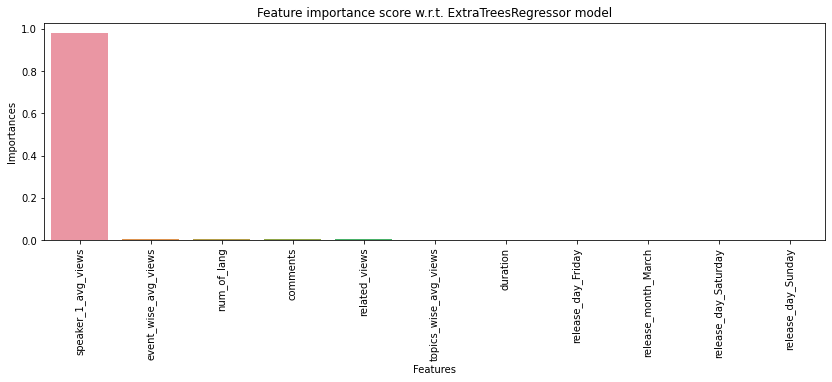

In [206]:
# Barplot showing important features w.r.t. ExtraTrees Regressor model.
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': et.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. ExtraTreesRegressor model')
plt.show()

Here speaker1_avg_views is the most important feature in RandomForestregressor. In all the models speaker_1_avg_views is impacting the much.

##### Which hyperparameter optimization technique have you used and why?

I have used randomizedsearchCV giving et_model with criterian MAE.In Random Search, the hyperparameters are chosen at random within a range of values that it can assume. The advantage of this method is that there is a greater chance of finding regions of the cost minimization space with more suitable hyperparameters, since the choice for each iteration is random. The disadvantage of this method is that the combination of hyperparameters is beyond the scientist’s control

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

All the ML regressor models that i have used here :

Random Forest Regressor

Extra Tree Regressor

XGB Regressor

In [207]:
# Let's define all these models
models = [
           ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=6,min_samples_leaf=30,min_samples_split=80,n_estimators=150,random_state=42)],
           ['ExtraTreeRegressor :',ExtraTreesRegressor(criterion='mae',max_depth=8, min_samples_leaf=50,min_samples_split=100, n_estimators=50)],
           ['XGBRegressor: ', XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=3, min_samples_leaf=40,
             min_samples_split=40, n_estimators=40)]        
        ]

In [208]:
# Let's run all the models and store the scores
model_data = []
for name,curr_model in models :
    model_dict = {}
    curr_model.random_state = 78
    model_dict["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    model_dict["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    model_dict["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    model_dict["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    model_dict["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    model_dict["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    model_dict["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(model_dict)

[06:11:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [209]:
# Now Printing the results dataframe
comparision_df = pd.DataFrame(model_data)
comparision_df

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,RandomForest,186638.460863,192011.316625,0.806400,0.803162,485112.674688,489031.640334
1,ExtraTreeRegressor :,197961.601666,195381.403519,0.796220,0.806408,497703.788585,484983.269104
2,XGBRegressor:,211051.556655,228812.768108,0.866211,0.832566,403273.960146,451028.530993


In [210]:
#  Final selection of the model
# Let's print the scores of Random Forest Regressor model
results_df_rf

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_train,RMSE_test
0,RandomForestRegressor,186755.615047,192512.213794,0.806505,0.802615,484980.885988,489710.718664


In [211]:
# Printing mean value of target variable.
print(f'Mean value of our target variable is {y.mean()}')

Mean value of our target variable is 1661354.1194756555


For Random Forest Regressor model, MAE is around 10 % of target variable mean.

We choose MAE and not RMSE as the deciding factor of our model selection because of the following reasons:

RMSE is heavily influenced by outliers as in the higher the values get the more the RMSE increases.

MAE doesn’t increase with outliers. MAE is linear and RMSE is quadratically increasing.

The best performing regressor model for this dataset is Random Forest Regressor on the basis of MAE.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Out of all the models,MAE of Random Forest Regressor is around 10% of average views. So, we have been able to predict views 90% correctly.

Out of all these models RandomForestRegressor is the best performer in terms of MAE.

Least viewed TED talks have words like war, politics, world, cultures, government while the most viewed TED talks have words like psychology, work, technology, science, humour.

In all the features speaker_wise_avg_views is most important this implies that speakers are directly impacting the views.

Majority of best TED talks are single speaker talks.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***